# Homework 6

"Personal Loan Acceptance. Universal Bank is a relatively young bank growing rapidly in terms of overall customer acquisition. The majority of these customers are liability customers (depositors) with varying sizes of relationship with the bank. The customer base of asset customers (borrowers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business. In particular, it wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).


A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise smarter campaigns with better target marketing. The goal is to use k-NN to predict whether a new customer will accept a loan offer. This will serve as the basis for the design of a new campaign.


The file UniversalBank.csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer’s relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (=9.6%) accepted the personal loan that was offered to them in the earlier campaign.


<code>Partition the data into training (60%) and validation (40%) sets.</code>


## Question 1
Consider the following customer: Age = 40, Experience = 10, Income = 84, Family = 2, CCAvg = 2, Education_1 = 0, Education_2 = 1, Education_3 = 0, Mortgage = 0, Securities Account = 0, CD Account = 0, Online = 1, and Credit Card = 1. Perform a k-NN classification with all predictors except ID and ZIP code using k = 1. Remember to transform categorical predictors with more than two categories into dummy variables first. Specify the success class as 1 (loan acceptance), and use the default cutoff value of 0.5. How would this customer be classified?

## Question 2
What is a choice of k that balances between overfitting and ignoring the predictor information?

## Question 3
Show the confusion matrix for the validation data that results from using the best k.

## Question 4
Consider the following customer: Age = 40, Experience = 10, Income = 84, Family = 2, CCAvg = 2, Education_1 = 0, Education_2 = 1, Education_3 = 0, Mortgage = 0, Securities Account = 0, CD Account = 0, Online = 1 and Credit Card = 1. Classify the customer using the best k.

## Question 5
Repartition the data, this time into training, validation, and test sets (50%:30%:20%). Apply the k-NN method with the k chosen above. Compare the confusion matrix of the test set with that of the training and validation sets. Comment on the differences and their reason."

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# import excel sheet and assign df to it.
df = pd.read_csv('UniversalBank.csv')

In [6]:
# Take a peek into data
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df = pd.get_dummies(df, columns=['Education']).drop('Education_3', axis=1)

In [8]:
# Look at more information on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Education_1         5000 non-null   uint8  
 14  Education_2         5000 non-null   uint8  
dtypes: float64(1), int64(12), uint8(2)
memory usage: 517.7 

In [31]:
# Get column names
list(df.columns)

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Education_1',
 'Education_2']

In [10]:
# New Customer
customer = [{'Age': 40, 
 'Experience': 10, 
 'Income': 84, 
 'Family': 2, 
 'CCAvg': 2, 
 'Education_1': 0,
 'Education_2': 1, 
 'Mortgage' : 0, 
 'Securities Account': 0, 
 'CD Account': 0, 
 'Online': 1, 
 'CreditCard': 1}]
new_customer = pd.DataFrame(customer)

In [11]:
# Import Train Test Split model and define X and y
from sklearn.model_selection import train_test_split
X = df.drop(['ID', 'ZIP Code', 'Personal Loan'], axis=1)
y= df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=13)

In [12]:
# Confirm Train size
print(f'Train Size: {len(X_train)/(len(X_test)+len(X_train))*100} %')
print(X_train.shape[0],y_train.shape[0])

Train Size: 60.0 %
3000 3000


In [13]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)
# Convert back to DataFrame
scaled_X_train = pd.DataFrame(scaled_features,columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)
# Scale added customer to compare
scaled_customer = pd.DataFrame(scaler.transform(new_customer), columns=X_train.columns)


In [14]:
scaled_customer

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2
0,-0.458765,-0.875412,0.214204,-0.335458,0.028666,-0.565726,3.016788,-0.257095,-1.204566,-0.641689,1.165543,1.63737


In [15]:
scaled_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3000 non-null   float64
 1   Experience          3000 non-null   float64
 2   Income              3000 non-null   float64
 3   Family              3000 non-null   float64
 4   CCAvg               3000 non-null   float64
 5   Mortgage            3000 non-null   float64
 6   Securities Account  3000 non-null   float64
 7   CD Account          3000 non-null   float64
 8   Online              3000 non-null   float64
 9   CreditCard          3000 non-null   float64
 10  Education_1         3000 non-null   float64
 11  Education_2         3000 non-null   float64
dtypes: float64(12)
memory usage: 281.4 KB


In [16]:
# Add Personal Loan column back and reset index in order to do so.
scaled_train = pd.concat([scaled_X_train, y_train.reset_index().drop('index', axis=1)], axis=1)

In [17]:
# Confirm 3000 rows
scaled_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3000 non-null   float64
 1   Experience          3000 non-null   float64
 2   Income              3000 non-null   float64
 3   Family              3000 non-null   float64
 4   CCAvg               3000 non-null   float64
 5   Mortgage            3000 non-null   float64
 6   Securities Account  3000 non-null   float64
 7   CD Account          3000 non-null   float64
 8   Online              3000 non-null   float64
 9   CreditCard          3000 non-null   float64
 10  Education_1         3000 non-null   float64
 11  Education_2         3000 non-null   float64
 12  Personal Loan       3000 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 304.8 KB


In [18]:
scaled_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Personal Loan
0,1.456869,1.395285,-0.237643,-1.208289,0.310529,-0.565726,-0.331478,-0.257095,0.830174,1.558387,-0.857969,-0.610735,0
1,-0.284617,-0.264070,-0.990721,-1.208289,-0.816925,0.316241,-0.331478,-0.257095,-1.204566,-0.641689,-0.857969,-0.610735,0
2,1.543943,1.569954,1.698844,-1.208289,-0.365943,3.893106,-0.331478,-0.257095,-1.204566,-0.641689,1.165543,-0.610735,0
3,0.150755,0.172602,1.074865,1.410204,1.719846,-0.565726,-0.331478,-0.257095,-1.204566,-0.641689,-0.857969,-0.610735,1
4,1.456869,1.569954,2.150691,-1.208289,1.550728,-0.565726,-0.331478,-0.257095,0.830174,1.558387,1.165543,-0.610735,0


In [19]:
# Import Nearest Neighbor model and fit Standardized Data excluding Zip, Personal Loan, and ID
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=1)
knn.fit(scaled_X_train)
distances, indices = knn.kneighbors(scaled_customer)

In [20]:
# Checking what index is close to customer
indices[0]

array([2434], dtype=int64)

In [21]:
# Showing the closest neighbor to new customer
scaled_train.iloc[indices[0]]

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Personal Loan
2434,-0.719988,-0.613408,0.020555,0.537373,0.366902,-0.565726,3.016788,-0.257095,-1.204566,-0.641689,-0.857969,1.63737,0


## Question 1 Answer
While using the KNN model with a neighbor of 1, I was able to show that personal loan will be 0, meaning **they will not be able to convert this customer to a personal loan**.

In [22]:
# Import classifier model for knn
from sklearn.neighbors import KNeighborsClassifier
# Import Accuracy metrics
from sklearn.metrics import accuracy_score

# Using different K values for best results (Elbow method)
results = []
for k in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=k).fit(scaled_X_train, y_train)
    results.append(accuracy_score(y_test, knn.predict(scaled_X_test)))
    
results

[0.961,
 0.9605,
 0.97,
 0.957,
 0.9635,
 0.955,
 0.96,
 0.95,
 0.955,
 0.9495,
 0.951,
 0.9475,
 0.95,
 0.9465,
 0.948]

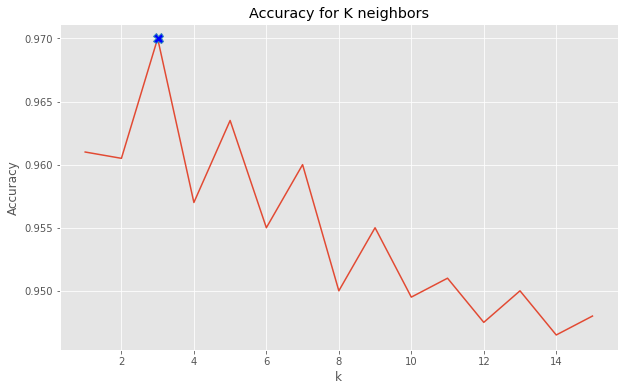

In [23]:
# Show visually accuracy with different k values
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sns.lineplot(x=range(1,16), y=results)
plt.title('Accuracy for K neighbors')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(3,results[2], marker='X', ms=10, markerfacecolor='b')

In [24]:
# Showing another method best k value by getting the error rate
error_rate = []
for x in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(scaled_X_train, y_train)
    predictions = knn.predict(scaled_X_test)
    error_rate.append(np.mean(predictions != y_test))

Text(0, 0.5, 'Error Rate')

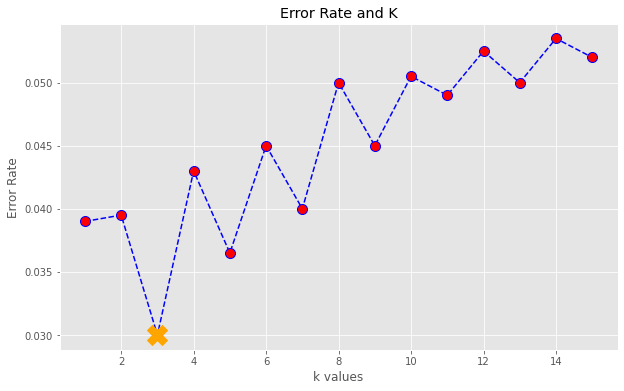

In [25]:
# Showing visual error rate for different k values
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(range(1,16), error_rate, color='blue', ls='--', marker='o', markerfacecolor='red', markersize=10)
plt.plot(range(1,16)[2],error_rate[2], 'X', color='orange', markersize=20)
plt.title('Error Rate and K')
plt.xlabel('k values')
plt.ylabel('Error Rate')

## Question 2 Answer
Visually you can see the best choice is choosing a k number of **3**

## Question 3 Answer below

In [26]:
# Import confusion matrix for validation using the new k values
from sklearn.metrics import confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_X_train,y_train)
new_predictions = knn.predict(scaled_X_test)
print(confusion_matrix(y_test, new_predictions))
print(classification_report(y_test, new_predictions))
print('\n')

[[1818    7]
 [  53  122]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1825
           1       0.95      0.70      0.80       175

    accuracy                           0.97      2000
   macro avg       0.96      0.85      0.89      2000
weighted avg       0.97      0.97      0.97      2000





## Question 4 Solution
Below are the 3 closes neighbors that all show no personal loan

In [27]:
distances, indices = knn.kneighbors(scaled_customer)
print(scaled_train.iloc[indices[0]]['Personal Loan'])

2434    0
2836    0
2246    0
Name: Personal Loan, dtype: int64


## Question 5 Solution
The less training data we use the less accurate we will be in predicting, at 50% test data you can see a decrease in accuracy. 

In [28]:
k = 3 # Assigned best k value
for test_percentage in [.2, .3, .5]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percentage, random_state=13)
    scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
    scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    predictions = knn.predict(scaled_X_test)
    print(f'Test Size: {test_percentage}')
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))
    print('\n')

Test Size: 0.2
[[906   5]
 [ 26  63]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       911
           1       0.93      0.71      0.80        89

    accuracy                           0.97      1000
   macro avg       0.95      0.85      0.89      1000
weighted avg       0.97      0.97      0.97      1000



Test Size: 0.3
[[1368    7]
 [  36   89]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1375
           1       0.93      0.71      0.81       125

    accuracy                           0.97      1500
   macro avg       0.95      0.85      0.89      1500
weighted avg       0.97      0.97      0.97      1500



Test Size: 0.5
[[2255   17]
 [  73  155]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2272
           1       0.90      0.68      0.78       228

    accuracy                           0.96      2500
  